In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mxnet as mx
mx.npx.set_np()

In [38]:
# Data augmentation definitions 
from mxnet.gluon.data.vision import transforms

crop_size=256
batch_size=32
# Data augmentation definitions 
transform_train = transforms.Compose([
    # Randomly crop an area, and then resize it to be 32x32
    transforms.RandomResizedCrop(crop_size,scale=(0.6,1.)),# test also with 0.6
    # Randomly flip the image horizontally/vertically
    transforms.RandomFlipLeftRight(),
    transforms.RandomFlipTopBottom(),
    # Randomly jitter the brightness, contrast and saturation of the image
    transforms.RandomColorJitter(brightness=0.6, contrast=0.6, saturation=0.6, hue=0.6), #NEW hue
    # Transpose the image from height*width*num_channels to num_channels*height*width
    transforms.RandomGray(p=0.35), # Random gray scale NEW
    # and map values from [0, 255] to [0,1]
    transforms.ToTensor(),
    transforms.RandomRotation(angle_limits=(-90,90),zoom_in=True), # Random rotation 
    # Normalize the image with mean and standard deviation calculated across all images
    transforms.Normalize([11.663384, 10.260227,  7.65015 ], [21.421959, 18.044296, 15.494861])
])

transform_test = transforms.Compose([
    transforms.Resize(crop_size),
    transforms.ToTensor(),
    transforms.Normalize([11.663384, 10.260227,  7.65015 ], [21.421959, 18.044296, 15.494861])
])

# Datasets/DataLoaders 
import sys
root = r'/home/foivos/Projects/'
sys.path.append(root)

from GalaxyZoo.src.GZooDataset import *
dataset_train = GZooData(root=os.path.join(root,'GalaxyZoo'), transform=transform_train)
datagen_train = gluon.data.DataLoader(dataset_train,batch_size=batch_size,shuffle=True,last_batch='rollover',pin_memory=True,num_workers=32)

dataset_dev = GZooData(root=os.path.join(root,'GalaxyZoo'), mode='dev',transform=transform_test)
datagen_dev = gluon.data.DataLoader(dataset_dev,batch_size=batch_size,shuffle=False,last_batch='rollover',pin_memory=True,num_workers=32)



In [11]:
idx_vis = 19

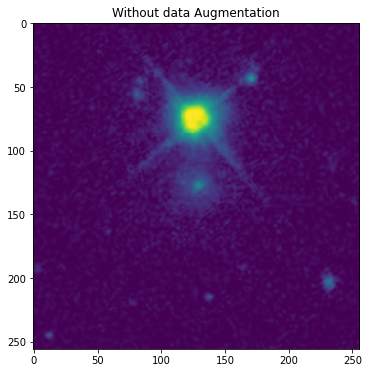

In [31]:
figure(figsize=(6,6))
img, _ = dataset_dev[idx_vis]

imshow(img.asnumpy().transpose([1,2,0])[:,:,2])
title("Without data Augmentation");
#xticks([])
#yticks([])

In [39]:
img, probs = dataset_train[idx_vis]

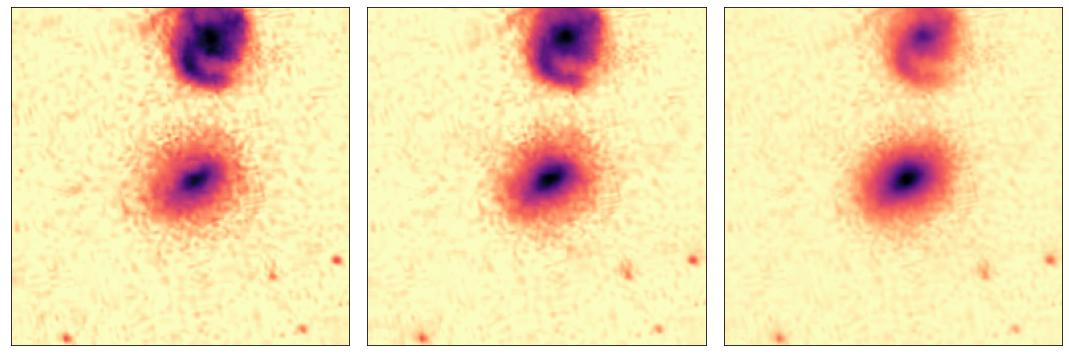

In [42]:
fig = figure(figsize=(15,5))
axs = [fig.add_subplot(1,3,i) for i in range(1,4)]

img, probs = dataset_train[idx_vis]
for i in range(3):
    axs[i].imshow(img.asnumpy().transpose([1,2,0])[:,:,i],cmap=cm.magma_r)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
tight_layout()